# Data Loading

In [42]:
# 유방암인지 일반 종양인지 데이터 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Bunch 데이터 형태 
cancer = load_breast_cancer()

# 데이터 분할 진행 (데이터 나오는 순서 중요)
# stratify = 레이블이 범주형일때만 사용 가능함 > 층화추출 > 범주별로 데이터를 분리 (범주 비율이 train, test 가 동일해진다)
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'], #층화추출 진행 (분류별 문제에서는 범주 갯수 고려)
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Voting

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 모델 하이퍼파라메터를 따로 줄 수 있음. 보팅에 참여할 분류기를 따로 만들 수 있다.
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

In [3]:
# VotingClassifier
from sklearn.ensemble import VotingClassifier

# '모델 이름', 모델 변수를 만들어서 넣어줌 
# models = [('knn1', knn1)]
hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr),
                         ('dt3', dt3), ('dt5', dt5)], voting='hard').fit(x_train, y_train) # 모델별로 예측된 범주를 집계 

soft = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr),
                         ('dt3', dt3), ('dt5', dt5)], voting='soft').fit(x_train, y_train) # 모델별로 예측된 확률을 집계 

In [4]:
hard.score(x_train, y_train), hard.score(x_test, y_test)

(0.9812206572769953, 0.951048951048951)

In [5]:
soft.score(x_train, y_train), soft.score(x_test, y_test)

(0.9953051643192489, 0.951048951048951)

### Voting (hard, soft) + 개별 예측 모형의 정확도 확인

In [6]:
names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
    model.fit(x_train, y_train)
    name = names[idx]
    train_score = model.score(x_train, y_train) * 100
    test_score = model.score(x_test, y_test) * 100
    print(f'{name} Train Accuracy:{train_score:.2f}%')
    print(f'{name} Test Accuracy:{test_score:.2f}%')
    print()

hard Train Accuracy:98.12%
hard Test Accuracy:95.10%

soft Train Accuracy:99.53%
soft Test Accuracy:95.80%

knn1 Train Accuracy:94.60%
knn1 Test Accuracy:91.61%

knn2 Train Accuracy:95.77%
knn2 Test Accuracy:91.61%

lr Train Accuracy:96.71%
lr Test Accuracy:93.71%

dt3 Train Accuracy:97.65%
dt3 Test Accuracy:91.61%

dt5 Train Accuracy:100.00%
dt5 Test Accuracy:90.91%



In [7]:
# VotingRegressor 동일함 
from sklearn.ensemble import VotingRegressor
VotingRegressor

sklearn.ensemble._voting.VotingRegressor

# Bagging - RandomForest

In [43]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9976525821596244, 0.9440559440559441)

In [44]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

# n_estimators
# - 분류기를 몇 개 만들 것인가? (Decision Tree) 많으면 많을수록 좋은게 아니다. 일정 수준까지만 올라가고 일정 시점 이후에는 성능이 안좋아짐 
# max_depth : DT의 최대 깊이를 어느 정도로 지정하는가? 

model = RandomForestClassifier(n_estimators=100, max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.951048951048951)

In [45]:
model.feature_importances_ # RandomForest 변수중요도 자잘하게 나온다

array([0.02804731, 0.0126832 , 0.04046199, 0.05126162, 0.00524703,
       0.01607026, 0.02453329, 0.13955595, 0.00169701, 0.00219765,
       0.01311099, 0.00570037, 0.01412069, 0.03366997, 0.00378678,
       0.00352711, 0.00499939, 0.00126242, 0.00232875, 0.00297676,
       0.11698535, 0.02007215, 0.10738984, 0.15377893, 0.00713619,
       0.01298514, 0.03531582, 0.12633394, 0.00400643, 0.0087577 ])

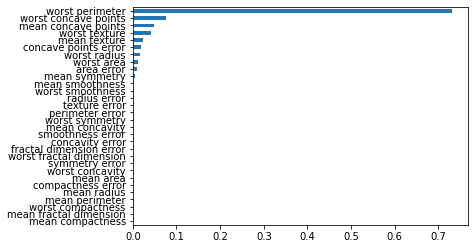

In [51]:
import pandas as pd 

fi = pd.Series(model.feature_importances_, index=cancer["feature_names"])
fi.sort_values().plot(kind='barh')#영향도를 전체적으로 보고 싶다면, 랜덤포레스트

# Boosting - GradientBoosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth=4).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9370629370629371)

In [48]:
model.feature_importances_ # 특정한 계수가 높게 나온다.  한두개 정도만 나오는 경우 

array([2.05700794e-06, 2.35468896e-02, 1.54381015e-07, 9.63320614e-05,
       3.01929958e-03, 3.74141966e-12, 1.08300014e-03, 4.91141824e-02,
       6.06624057e-03, 1.01451819e-09, 2.65536158e-03, 1.87644883e-03,
       1.50036377e-03, 1.00025109e-02, 9.27060611e-04, 3.14883353e-06,
       9.25731983e-04, 1.85469440e-02, 6.95753455e-04, 8.04811119e-04,
       1.56237567e-02, 4.11526087e-02, 7.30424726e-01, 1.12239684e-02,
       2.68204354e-03, 2.05007845e-08, 2.41249774e-04, 7.59521607e-02,
       1.09994379e-03, 7.33229987e-04])

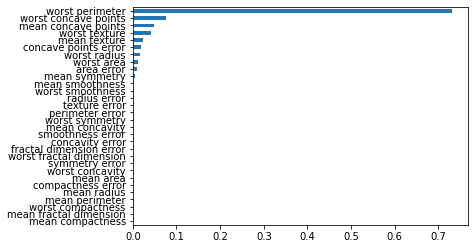

In [50]:
fi = pd.Series(model.feature_importances_, index=cancer["feature_names"])
fi.sort_values().plot(kind='barh')#젤중요한 피쳐만 확인하고 싶다면 GrandientBoosting

In [52]:
from sklearn.datasets import load_boston

boston = load_boston()

x_train2, x_test2, y_train2, y_test2 = train_test_split(boston["data"], boston["target"], 
                                                       random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.7697699488741149, 0.635463843320211)

In [55]:
from sklearn.ensemble import RandomForestRegressor#회귀에 대해 overfitting 가능성이 높음
model = RandomForestRegressor().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.983979204210904, 0.7943785634234231)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.9829864654169255, 0.8255093706526744)

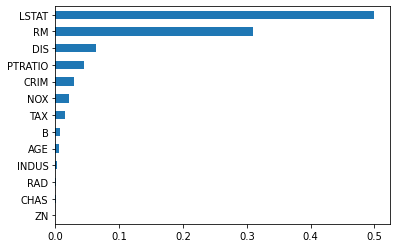

In [57]:
pd.Series(model.feature_importances_, index=boston['feature_names']).sort_values().plot(kind='barh')

# Grid-Search - 분류

In [20]:
from sklearn.datasets import load_breast_cancer
# CV 교차검증 -> 데이터를 동일한 크기로 분할(Fold) -> 각 Fold를 Test로 지정하여 여러번 실험
from sklearn.model_selection import GridSearchCV # CV : 교차검증 수행 , 값이 높은 모델을 Best로 선정함 
from sklearn.ensemble import GradientBoostingClassifier

# Bunch 데이터 형태 
cancer = load_breast_cancer()

# Baseline 모델 
model = GradientBoostingClassifier(random_state=0)

# 주어지는 파라메터에 따라 속도가 매우 오래 걸릴 수 있다.
params = {
    'learning_rate' : [0.01, 0.01, 0.1], # 앞선 모델의 오류를 얼만큼 반영 할 것인지?
    'max_depth' : [3, 4, 5], # DT의 최대 깊이 
    'max_features' : [10, 20] # 최대 사용 가능한 특성의 개수
}  

# GridSearchCV 수행시 데이터를 train, test로 분할하지 않아도 됨
gs = GridSearchCV(model, params).fit(cancer.data, cancer.target)
gs

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'max_features': [10, 20]})

In [60]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')#rank이므로 작을수록 좋은것이다.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.109801,0.001725,0.000650,0.000023,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.783812,0.857255,0.742070,0.570781,0.394882,0.669760,0.166581,1
19,0.328022,0.004611,0.001003,0.000013,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.784743,0.841977,0.750611,0.554167,0.389019,0.664103,0.168187,2
20,0.547035,0.008194,0.001282,0.000024,0.1,3,500,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.779593,0.841031,0.755053,0.552954,0.379286,0.661583,0.171089,3
2,0.545840,0.007736,0.001223,0.000039,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.762956,0.867336,0.738485,0.535428,0.380540,0.656949,0.175110,4
11,0.547120,0.008022,0.001219,0.000031,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.762956,0.867336,0.738485,0.535428,0.380540,0.656949,0.175110,4
21,0.134149,0.001965,0.000754,0.000022,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.786304,0.824756,0.703891,0.579527,0.298256,0.638547,0.189767,6
22,0.402467,0.006345,0.001191,0.000022,0.1,4,300,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.791083,0.826134,0.701348,0.554677,0.277191,0.630087,0.199827,7
23,0.670865,0.008965,0.001558,0.000042,0.1,4,500,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.794082,0.826204,0.700705,0.550373,0.272191,0.628711,0.202375,8
1,0.328283,0.005274,0.000947,0.000041,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.756358,0.865449,0.691776,0.484630,0.314734,0.622589,0.197722,9
10,0.328399,0.005775,0.000939,0.000020,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.756358,0.865449,0.691776,0.484630,0.314734,0.622589,0.197722,9


In [22]:
GradientBoostingClassifier(**gs.best_params_)

GradientBoostingClassifier(max_features=10)

# Grid-Search - 회귀

In [61]:
from sklearn.datasets import load_boston
# CV 교차검증 -> 데이터를 동일한 크기로 분할(Fold) -> 각 Fold를 Test로 지정하여 여러번 실험
from sklearn.model_selection import GridSearchCV # CV : 교차검증 수행 , 값이 높은 모델을 Best로 선정함 
# 회귀모델에서는 MAE, MSE, RMSE 사용함. 낮을수록 좋음 
from sklearn.ensemble import GradientBoostingRegressor

boston = load_boston()

# Baseline 모델 
model = GradientBoostingRegressor(random_state=0)

# 주어지는 파라메터에 따라 속도가 매우 오래 걸릴 수 있다.
params = {
    'n_estimators' : [100, 300, 500], # 분류기의 개수 
    'learning_rate' : [0.01, 0.01, 0.1], # 앞선 모델의 오류를 얼만큼 반영 할 것인지?
    'max_depth' : [3, 4, 5], # DT의 최대 깊이 
    'max_features' : [7, 10] # 최대 사용 가능한 특성의 개수
}  

# GridSearchCV 수행시 데이터를 train, test로 분할하지 않아도 됨
# 회귀모델 사용시 이것을 써야 된다!
# - scoring='neg_mean_absolute_error' : MAE가 낮을 수록 좋은 모델 선택
#           'neg_mean_squared_error' : MSE가 낮은 수록 좋은 모델 선택
# 결과는 마이너스가 나올텐데 여기에 * -1 해주면 된다. (부호 무시해도 됨)
gs = GridSearchCV(model, params, scoring='neg_mean_absolute_error').fit(boston.data, boston.target)
gs

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'max_features': [7, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_absolute_error')

In [63]:
pd.DataFrame(gs.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074008,0.001039,0.000653,0.000031,0.01,3,7,100,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.991279,-3.838458,-5.163388,-5.081986,-4.457233,-4.306469,0.813293,51
1,0.218407,0.002764,0.001002,0.000075,0.01,3,7,300,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.313580,-2.595349,-3.508240,-3.964360,-3.154779,-3.107262,0.598272,37
2,0.363354,0.006620,0.001260,0.000053,0.01,3,7,500,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.274481,-2.588614,-3.219857,-3.723926,-2.947703,-2.950916,0.501739,19
3,0.093037,0.001561,0.000625,0.000017,0.01,3,10,100,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.976407,-3.804186,-5.460877,-5.095924,-4.421125,-4.351704,0.892207,53
4,0.276259,0.004875,0.000969,0.000036,0.01,3,10,300,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.293343,-2.539757,-3.692916,-3.890901,-3.124648,-3.108313,0.623202,39


In [25]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.511652,0.007486,0.001822,0.000030,0.1,5,7,500,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.165439,-2.822227,-2.906266,-3.459570,-2.988546,-2.868410,0.415123,1
48,0.103045,0.001578,0.000765,0.000032,0.1,5,7,100,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.184135,-2.794347,-2.933148,-3.458599,-2.973726,-2.868791,0.409224,2
49,0.306944,0.004647,0.001352,0.000027,0.1,5,7,300,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.167164,-2.820053,-2.908010,-3.460485,-2.988572,-2.868857,0.414884,3
32,0.511895,0.007820,0.002103,0.000100,0.01,5,7,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",-2.135044,-2.695517,-3.063603,-3.483198,-2.996440,-2.874761,0.447207,4
14,0.511940,0.009773,0.002150,0.000054,0.01,5,7,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",-2.135044,-2.695517,-3.063603,-3.483198,-2.996440,-2.874761,0.447207,4
39,0.092116,0.001340,0.000616,0.000029,0.1,3,10,100,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.157122,-2.745370,-3.463629,-3.353399,-2.763140,-2.896532,0.472799,6
26,0.436525,0.007817,0.001645,0.000075,0.01,4,7,500,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",-2.208418,-2.743499,-3.130612,-3.495194,-2.915315,-2.898608,0.426718,7
8,0.434484,0.006887,0.001649,0.000041,0.01,4,7,500,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",-2.208418,-2.743499,-3.130612,-3.495194,-2.915315,-2.898608,0.426718,7
36,0.072141,0.001352,0.000569,0.000007,0.1,3,7,100,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.179902,-2.833312,-3.016203,-3.629251,-2.844869,-2.900707,0.462890,9
38,0.361646,0.007437,0.001224,0.000026,0.1,3,7,500,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.231168,-2.943253,-2.877771,-3.710966,-2.777924,-2.908217,0.473695,10


In [26]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 7, 'n_estimators': 500}

In [27]:
# 최적 선정된 모델의 Best Parameter로 GradientBoostingRegressor 생성 
GradientBoostingRegressor(**gs.best_params_).fit(x_test, y_test)

GradientBoostingRegressor(max_depth=5, max_features=7, n_estimators=500)

# Stacking

In [28]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()), 
              ('gb', GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,
                         final_estimator=LogisticRegression())

model.fit(x_train, y_train).score(x_test, y_test)

0.958041958041958

In [29]:
StackingClassifier

sklearn.ensemble._stacking.StackingClassifier

# XGBoost

In [30]:
!pip install xgboost

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [31]:
import xgboost as xgb

# 또는 
from xgboost import XGBClassifier # 분류모델 
from xgboost import XGBRFRegressor # 회귀모델

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
    
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)
# 튜닝해야 하는 파라메터가 많다
model = xgb.XGBRegressor(objective ='reg:linear')
model.fit(x_train, y_train)

p_train = model.predict(x_train)
p_test = model.predict(x_test)

r2_score(y_train, p_train), r2_score(y_test, p_test)

[01:18:12] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


(0.999999003030776, 0.7476326752660457)

In [32]:
!pip install lightgbm

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


# LightGBM

In [33]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                  early_stopping_rounds=5)#early_stopping_rounds은 overrfitting을 방지하기 위해 사용함!

p_train = model.predict(x_train, num_iteration=model.best_iteration)
p_test = model.predict(x_test, num_iteration=model.best_iteration)

r2_score(y_train, p_train), r2_score(y_test, p_test)

/opt/conda/lib/python3.6/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.608707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 70.5396
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 61.4369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 53.753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 47.6561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 42.6525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 

(0.9524522112992748, 0.7369037475494296)

In [34]:
# 데이터 세트 준비
from sklearn.datasets import load_digits


# 데이터 분할


# 모델 평가 (가장 좋은 Classification 모델을 찾아보세요.)



In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()

model = GradientBoostingRegressor(random_state=0)

params = {
    'n_estimators' : [100, 300, 500],
    'learning_rate' : [0.01, 0.01, 0.1],
    'max_depth' : [3, 4, 5],
}

gs = GridSearchCV(model, params).fit(boston.data, boston.target)
gs

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.01, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 300, 500]})

In [36]:
import pandas as pd
report = pd.DataFrame(gs.cv_results_)
report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.114536,0.005468,0.000666,0.000040,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.622020,0.688112,0.220861,0.325642,-0.175309,0.336265,0.310029,24
1,0.328283,0.005274,0.000947,0.000041,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.756358,0.865449,0.691776,0.484630,0.314734,0.622589,0.197722,9
2,0.545840,0.007736,0.001223,0.000039,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.762956,0.867336,0.738485,0.535428,0.380540,0.656949,0.175110,4
3,0.135954,0.004044,0.000706,0.000030,0.01,4,100,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.633338,0.626206,0.314555,0.374583,-0.250098,0.339717,0.321876,22
4,0.400393,0.006744,0.001178,0.000044,0.01,4,300,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.756735,0.807186,0.656688,0.506602,0.123035,0.570049,0.245943,13
5,0.665433,0.010462,0.001522,0.000061,0.01,4,500,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.768721,0.808021,0.693576,0.544797,0.224560,0.607935,0.211747,11
6,0.158405,0.003741,0.000815,0.000017,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.634855,0.560458,0.290091,0.377049,-0.234089,0.325673,0.305927,26
7,0.471141,0.008411,0.001430,0.000077,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.741932,0.763737,0.582341,0.477830,0.032308,0.519629,0.265394,20
8,0.782538,0.013632,0.001951,0.000090,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.753964,0.763259,0.622998,0.498162,0.105823,0.548841,0.241819,16
9,0.110356,0.001655,0.000638,0.000028,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.622020,0.688112,0.220861,0.325642,-0.175309,0.336265,0.310029,24


In [37]:
gs.best_params_ 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [38]:
gs.best_score_

0.6697600256867121

In [39]:
gs.best_estimator_

GradientBoostingRegressor(random_state=0)